In [25]:
import pandas as pd 
import json 
import random
import datetime
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
import numpy as np
from collections import Counter


In [26]:

file = 'BTC.csv'
data = pd.read_csv(file, parse_dates=['time'], index_col="time",low_memory = False)
data['time'] = data.index

In [27]:
print("There are {:,} trades".format(data.shape[0]))

There are 100,025 trades


In [28]:
print("There are {:,} orders".format(data.order_id.nunique()))

There are 54,441 orders


In [29]:
data.head()

,Unnamed: 0,order_id,order_type,size,price,client_oid,type,side,product_id,sequence,...,funds,trade_id,maker_order_id,taker_order_id,old_size,new_size,old_price,new_price,channels,time
time,,,,,,,,,,,,,,,,,,,,,
2023-02-06 13:36:23.233071+00:00,0,92c56a2e-4a12-4c26-b816-6c00dc24567c,limit,1.114479,240.0,a522effc-79cc-4f39-803c-4a4fdfa683ff,received,buy,BTC-USD,776841608.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06 13:36:23.233071+00:00
2023-02-06 13:36:23.233071+00:00,1,92c56a2e-4a12-4c26-b816-6c00dc24567c,NaN,NaN,240.0,NaN,open,buy,BTC-USD,776841609.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06 13:36:23.233071+00:00
2023-02-06 13:36:23.865038+00:00,2,130d7c98-c3dc-41d3-8ab4-a5357f5c23a9,limit,1.114479,240.0,d75495dc-a584-4d14-8256-4ec96a268b43,received,buy,BTC-USD,776841610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06 13:36:23.865038+00:00
2023-02-06 13:36:23.865038+00:00,3,130d7c98-c3dc-41d3-8ab4-a5357f5c23a9,NaN,NaN,240.0,NaN,open,buy,BTC-USD,776841611.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06 13:36:23.865038+00:00
2023-02-06 13:36:25.103053+00:00,4,130d7c98-c3dc-41d3-8ab4-a5357f5c23a9,NaN,NaN,240.0,NaN,done,buy,BTC-USD,776841612.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-02-06 13:36:25.103053+00:00


In [30]:
imp = ['price', 'remaining_size', 'side', 'type', 'reason', 'order_id']
data[imp].head(10)

,price,remaining_size,side,type,reason,order_id
time,,,,,,
2023-02-06 13:36:23.233071+00:00,240.0,NaN,buy,received,NaN,92c56a2e-4a12-4c26-b816-6c00dc24567c
2023-02-06 13:36:23.233071+00:00,240.0,1.114479,buy,open,NaN,92c56a2e-4a12-4c26-b816-6c00dc24567c
2023-02-06 13:36:23.865038+00:00,240.0,NaN,buy,received,NaN,130d7c98-c3dc-41d3-8ab4-a5357f5c23a9
2023-02-06 13:36:23.865038+00:00,240.0,1.114479,buy,open,NaN,130d7c98-c3dc-41d3-8ab4-a5357f5c23a9
2023-02-06 13:36:25.103053+00:00,240.0,1.114479,buy,done,canceled,130d7c98-c3dc-41d3-8ab4-a5357f5c23a9
2023-02-06 13:36:28.467726+00:00,240.0,1.114479,buy,done,canceled,92c56a2e-4a12-4c26-b816-6c00dc24567c
2023-02-06 13:36:29.414124+00:00,270.0,NaN,buy,received,NaN,a26ba558-dd03-4d84-877d-200ead9775f5
2023-02-06 13:36:29.414124+00:00,270.0,0.990648,buy,open,NaN,a26ba558-dd03-4d84-877d-200ead9775f5
2023-02-06 13:36:30.126092+00:00,270.0,NaN,buy,received,NaN,46cb6155-ed7e-4fc5-b87d-8b80204fbbc7


In [31]:
import numpy as np
dt = data.time.diff().iloc[1:].dt
dt = dt.seconds.astype(float) + dt.microseconds*1e-6
dt*=1000

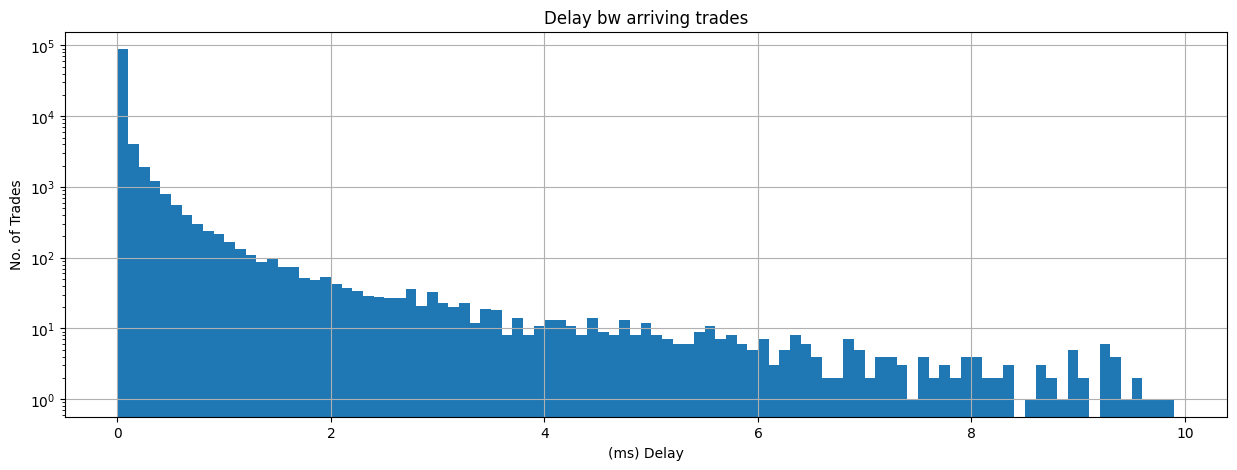

In [32]:
import numpy as np
import matplotlib.pyplot as plt
bins = np.arange(0, 10, 0.1)
dt.sort_values().diff().hist(bins=bins)  
plt.xlabel("(ms) Delay")
plt.ylabel("No. of Trades")
plt.yscale('log')
plt.title("Delay bw arriving trades")
plt.show()

In [33]:
print( "Minimum non zero number of milliseconds: ", dt[dt>0].min())

Minimum non zero number of milliseconds:  0.028


In [34]:
data[data.order_id=='130d7c98-c3dc-41d3-8ab4-a5357f5c23a9'][imp+['order_type']]

,price,remaining_size,side,type,reason,order_id,order_type
time,,,,,,,
2023-02-06 13:36:23.865038+00:00,240.0,NaN,buy,received,NaN,130d7c98-c3dc-41d3-8ab4-a5357f5c23a9,limit
2023-02-06 13:36:23.865038+00:00,240.0,1.114479,buy,open,NaN,130d7c98-c3dc-41d3-8ab4-a5357f5c23a9,NaN
2023-02-06 13:36:25.103053+00:00,240.0,1.114479,buy,done,canceled,130d7c98-c3dc-41d3-8ab4-a5357f5c23a9,NaN
